In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold

from sklearn.base import clone
from sklearn.model_selection import train_test_split

In [3]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_test[11].astype(np.float64))
y=np.array(y_test[12].astype(np.float64))
z=np.array(y_test[13].astype(np.float64))


In [9]:

C=np.logspace(-4,3,5)

gamma=np.logspace(-4,2,5)

coef=np.linspace(-10,10,3)+1

#deg=np.arange(1,3,1)

parameters_SVM_poly= {
    'estimator__C':C,
    'estimator__kernel': ['rbf'],
    'estimator__gamma':gamma,
    #'estimator__coef0':coef ,
    #'estimator__degree':deg ,
    'estimator__epsilon': [0.1] 
}      

# with GridSearch
grid_search_SVM_poly = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM_poly,
    refit='neg_mean_absolute_error',
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring='neg_mean_absolute_error',
)

In [11]:
SVM=grid_search_SVM_poly.fit(x_train, y_train)
print(grid_search_SVM_poly.best_params_) 
print('Best Score - Validation:', grid_search_SVM_poly.best_score_ )

y_pred_SVM =SVM.predict(x_test)

print('Accuracy Score - SVM - Test-error:', metrics.mean_squared_error(y_test, y_pred_SVM))
cv_results_df = pd.DataFrame(grid_search_SVM_poly.cv_results_)
cv_results_df


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 3/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0001, estimator__kernel=rbf;, score=(train=-17.732, test=-16.677) total time=   0.1s
[CV 1/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0001, estimator__kernel=rbf;, score=(train=-17.536, test=-17.447) total time=   0.1s
[CV 4/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0001, estimator__kernel=rbf;, score=(train=-17.366, test=-18.134) total time=   0.1s
[CV 1/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0031622776601683794, estimator__kernel=rbf;, score=(train=-17.536, test=-17.446) total time=   0.1s
[CV 5/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0001, estimator__kernel=rbf;, score=(train=-17.309, test=-18.360) total time=   0.1s
[CV 2/5] END estimator__C=0.0001, estimator__epsilon=0.1, estimator__gamma=0.0031622776601683794, estimator__kern

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__epsilon,param_estimator__gamma,param_estimator__kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080273,0.020188,0.030593,0.008995,0.0001,0.1,0.0001,rbf,"{'estimator__C': 0.0001, 'estimator__epsilon':...",-17.446537,...,-17.539909,0.630656,24,-17.536472,-17.628615,-17.732364,-17.365795,-17.308991,-17.514447,0.158314
1,0.093028,0.017179,0.026933,0.003494,0.0001,0.1,0.003162,rbf,"{'estimator__C': 0.0001, 'estimator__epsilon':...",-17.446155,...,-17.539530,0.630644,23,-17.536092,-17.628229,-17.731972,-17.365419,-17.308618,-17.514066,0.158307
2,0.078498,0.010194,0.025738,0.003762,0.0001,0.1,0.1,rbf,"{'estimator__C': 0.0001, 'estimator__epsilon':...",-17.441519,...,-17.534872,0.630489,19,-17.531408,-17.623503,-17.727207,-17.360811,-17.304051,-17.509396,0.158234
3,0.064968,0.005029,0.022555,0.000382,0.0001,0.1,3.162278,rbf,"{'estimator__C': 0.0001, 'estimator__epsilon':...",-17.446031,...,-17.539363,0.630657,22,-17.535809,-17.627974,-17.731728,-17.365146,-17.308354,-17.513802,0.158316
4,0.126269,0.015217,0.034367,0.003800,0.0001,0.1,100.0,rbf,"{'estimator__C': 0.0001, 'estimator__epsilon':...",-17.446541,...,-17.539910,0.630657,25,-17.536371,-17.628517,-17.732265,-17.365695,-17.308891,-17.514348,0.158315
5,0.069813,0.008699,0.025125,0.003372,0.005623,0.1,0.0001,rbf,"{'estimator__C': 0.005623413251903491, 'estima...",-17.445823,...,-17.539201,0.630633,20,-17.535762,-17.627895,-17.731634,-17.365093,-17.308296,-17.513736,0.158302
6,0.072852,0.008075,0.023975,0.002111,0.005623,0.1,0.003162,rbf,"{'estimator__C': 0.005623413251903491, 'estima...",-17.424294,...,-17.517825,0.629773,18,-17.514357,-17.606178,-17.709634,-17.343930,-17.287373,-17.492294,0.157922
7,0.078490,0.013049,0.023809,0.002087,0.005623,0.1,0.1,rbf,"{'estimator__C': 0.005623413251903491, 'estima...",-17.163917,...,-17.258631,0.621396,14,-17.252250,-17.340781,-17.442259,-17.086320,-17.032187,-17.230759,0.153357
8,0.074034,0.011225,0.023741,0.002950,0.005623,0.1,3.162278,rbf,"{'estimator__C': 0.005623413251903491, 'estima...",-17.417139,...,-17.508386,0.630602,17,-17.498464,-17.591847,-17.695912,-17.328579,-17.272489,-17.477458,0.158383
9,0.112681,0.006750,0.033825,0.003689,0.005623,0.1,100.0,rbf,"{'estimator__C': 0.005623413251903491, 'estima...",-17.446044,...,-17.539228,0.630692,21,-17.530097,-17.622353,-17.726113,-17.359465,-17.302705,-17.508146,0.158333


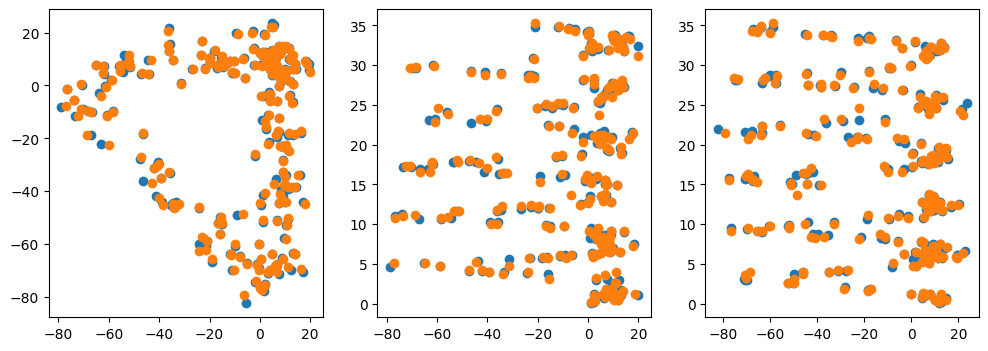

In [21]:
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred_SVM[:,0],y_pred_SVM[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred_SVM[:,0],y_pred_SVM[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred_SVM[:,1],y_pred_SVM[:,2])